# Irreducible Mass of Black Holes

$f(\chi) = M_{irr} = M \sqrt{\frac{1+\sqrt{1-\chi^{2}}}{2}}$ with the spin $\chi \in [0,1]$ is the irreducible mass of a black hole.

Suppouse you have repeated measurements of $M$ and $\chi$ and let's assume that
 - the spin is uniformly distributed between $0$ and $1$.
 - the mass $M$ is normally distributed with mean $\mu$ and standard distribution $\sigma$.
 - (masses and spins are uncorrelated)

In [2]:

import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.path.append(r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities\plot_settings.py")
from Utilities import plot_settings
from scipy import stats

1. Start with a value of $\sigma = 0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities witha  dimenion of mass by $\mu$. Just set $\mu = 1$ and remember that all masses are measured in units of $\mu$.

In [3]:
N = int(1e4)

In [4]:
chi = np.random.uniform(0,1,N) # Chi values extracted from uniform distribution
mu = 1 # for convenience
sigma = 0.02
M   = np.random.normal(mu,sigma,N) # M values extracted from normal distribution

2. Plot the resulting pdf of $M_{irr}$. First try an histogram with one of the rules of thumb seen during lecture

In [5]:
def Mirr(M,chi):
    try:
        M.size == chi.size
    except:
        raise IndexError("Sizes of masses and spins should be equal!")
    return M*np.sqrt(0.5 * (1+np.sqrt(1-chi**2)))

def f(chi):
    return np.sqrt(0.5 * (1+np.sqrt(1-chi**2)))

In [6]:
data = Mirr(M,chi)

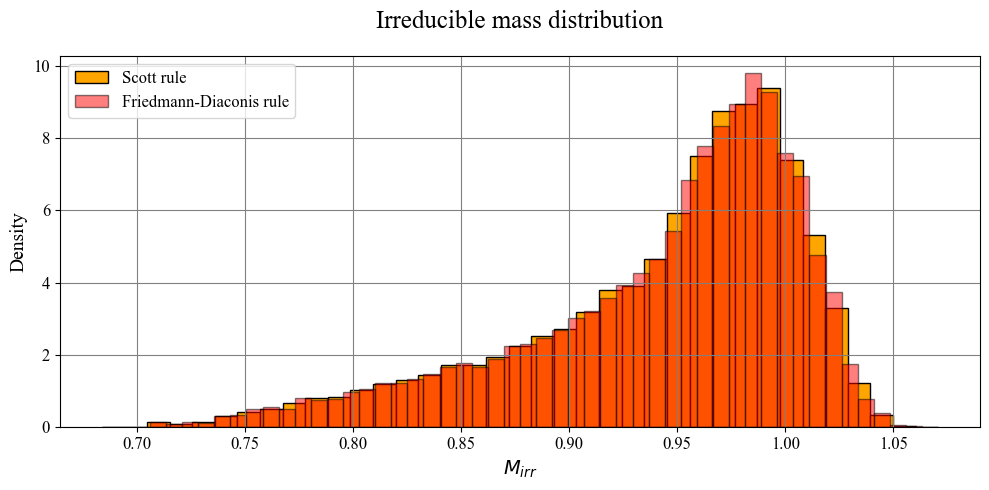

In [7]:
scott_c, scott_b, _ = plt.hist(data, density=True, bins='scott', histtype='barstacked', color='orange', edgecolor='black', label='Scott rule')
fd_c, fd_b, _ = plt.hist(data, bins='fd', density=True, histtype='barstacked', color='red', edgecolor='black', alpha=0.5, label='Friedmann-Diaconis rule')
plt.title('Irreducible mass distribution')
plt.ylabel('Density')
plt.xlabel(r'$M_{irr}$')
plt.legend()

3. Using the same samples, plot the distribution of $M_{irr}$ using KDE.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.reshape(-1,1)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KernelDensity

In [11]:
def check_bset_bw(bws):
    scores = []
    for bw in bws:
        gauss_KDE  = KernelDensity(bandwidth=bw, kernel='gaussian')
        gauss_KDE.fit(X_train)
        scores.append(gauss_KDE.score(X_test))
    bw_pref = bws[np.argmax(scores)]
    return bw_pref, scores

In [12]:
bandwidths = np.power(10,np.linspace(-5,0,20))

In [13]:
bw_pref, scores = check_bset_bw(bandwidths)
gauss_KDE  = KernelDensity(bandwidth=bw_pref, kernel='gaussian')
gauss_KDE.fit(X_train)

KernelDensity(bandwidth=np.float64(0.004281332398719391))

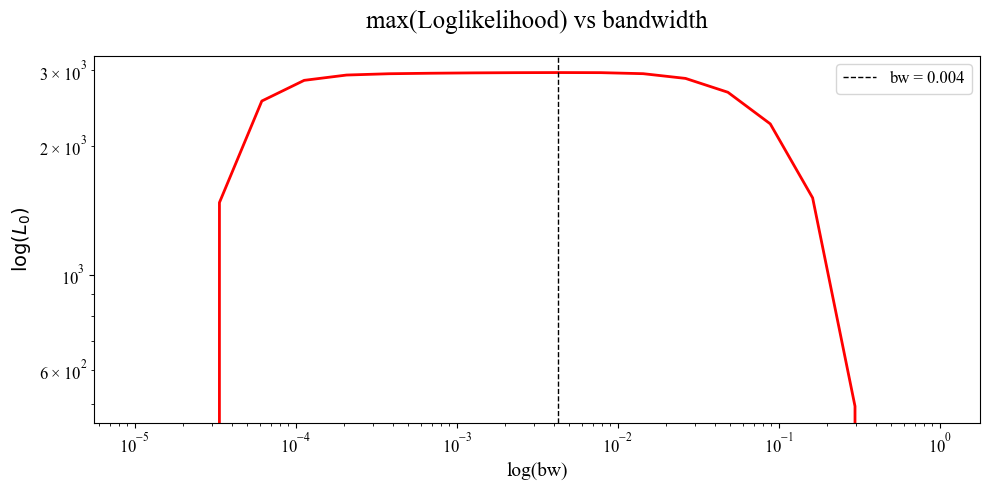

In [14]:
plt.plot(bandwidths, scores, linewidth=2, color='red')
plt.title(r'max(Loglikelihood) vs bandwidth')
plt.axvline(bw_pref,0,1,linestyle='--', color='black', linewidth=1, label=f'bw = {bw_pref:.1}')
plt.ylabel(r'$\log(L_0)$')
plt.xlabel('log(bw)')
plt.loglog()
plt.grid()
plt.legend()

In [15]:
x_plot = np.linspace(min(scott_b), max(scott_b), N)
y_plot = np.exp(gauss_KDE.score_samples(x_plot.reshape(-1,1)))

4. Compute the KS distance between $\frac{M_{irr}}{\mu}$ and $f$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

In [16]:
fs = f(chi).reshape(-1,1)

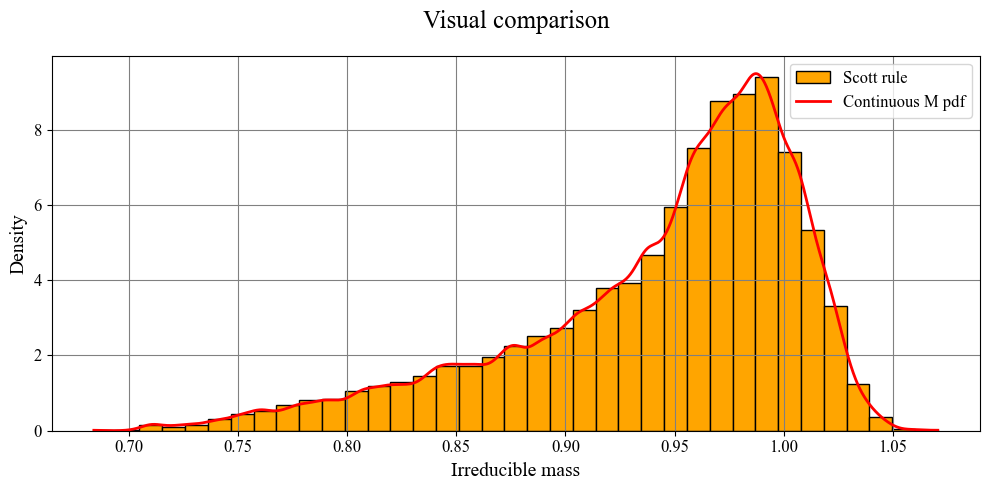

In [17]:
scott_c, scott_b, _ = plt.hist(data, density=True, bins='scott', histtype='barstacked', color='orange', edgecolor='black', label='Scott rule')
plt.plot(x_plot,y_plot,linewidth=2, color='red',label='Continuous M pdf')
plt.title('Visual comparison')
plt.xlabel('Irreducible mass')
plt.ylabel('Density')
plt.legend()

Let's see what happenes to KS statistic by changing the value of $\sigma$

In [18]:
sigmas = np.power(10,np.linspace(-5,5,100))

In [19]:
results, results2 = [], []
for i,s in enumerate(sigmas):
    M   = np.random.normal(mu,s,N) # M values extracted from normal distribution
    D   = Mirr(M,chi)
    statistic, p_value = stats.ks_2samp(M, D)
    statistic2, p_value2 = stats.ks_2samp(chi, D)
    results.append([statistic, p_value, s])
    results2.append([statistic2, p_value2, s])
    
results = np.array(results)
results2 = np.array(results2)

5. Compute the KS distance between $M_{irr}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

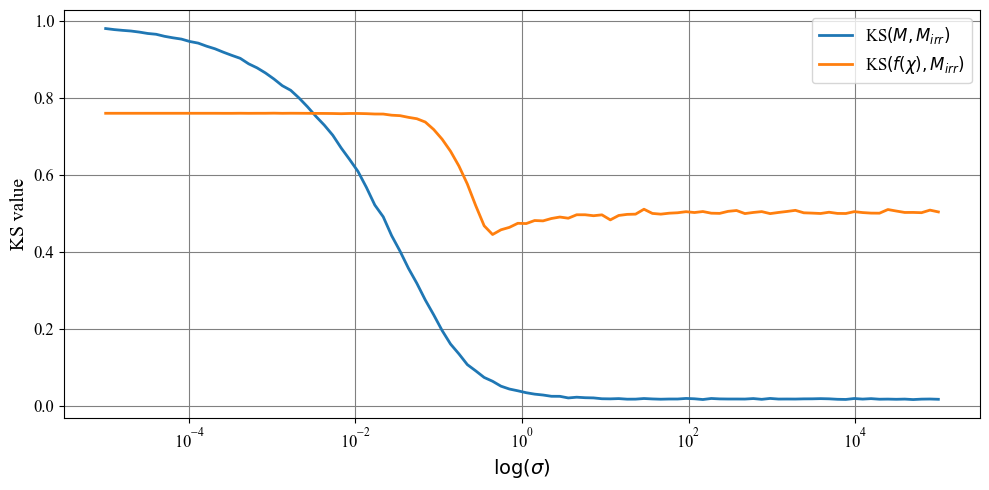

In [20]:
plt.plot(sigmas,results.T[0], linewidth=2, label=r'KS$(M,M_{irr})$')
plt.plot(sigmas,results2.T[0], linewidth=2, label=r'KS$(f(\chi),M_{irr})$')
plt.semilogx()
plt.ylabel('KS value')
plt.xlabel(r'$\log(\sigma)$')
plt.legend()